## Diwali sales analysis project
#### I will show the data analysis project which is based on diwali shopping in different state and different age group

#### import the important library which will use in analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data set which will use in analysis

In [ ]:
data = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape' )

### overview of our data

In [ ]:
data.shape

(11251, 15)

In [ ]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## data cleaning part

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##### we have a rough idea about our data that status and unnamed1 contain all null value so we can drop both column and in amount column there is some null value present so we will handle that too

In [ ]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)# to make that changes permanant we need inplace

In [ ]:
data.isnull().sum()# to handle the null value in the amount column

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
# data['Amount'] = data['Amount'].astype('int')

In [ ]:
data[['Age','Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#### we have some statics on our data in specific columns

## Exploratory Data Analysis

### gender

<Axes: xlabel='Gender', ylabel='count'>

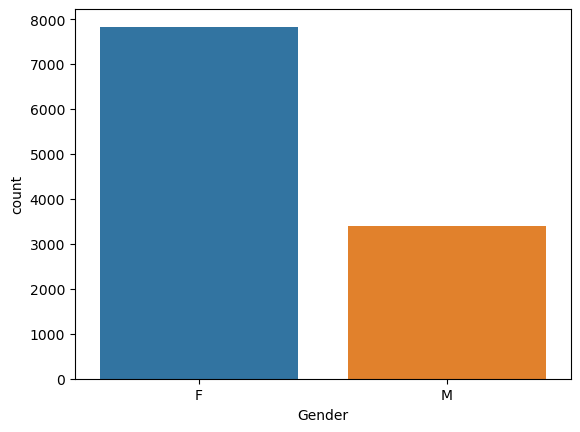

In [ ]:
sns.countplot(x='Gender', data=data)

#### by this

<Axes: xlabel='Gender', ylabel='Amount'>

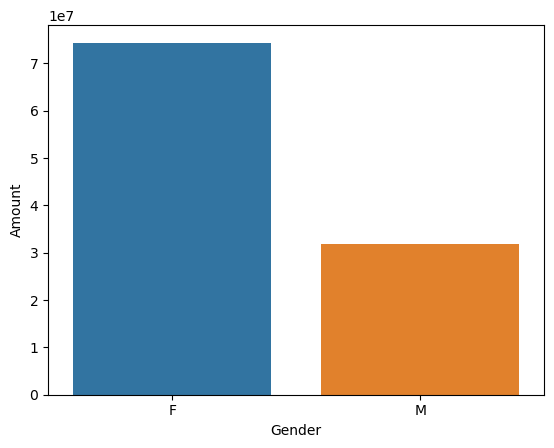

In [ ]:
gender_data=data.groupby(['Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Gender', y='Amount', data=gender_data)

## Age

<Axes: xlabel='Age Group', ylabel='count'>

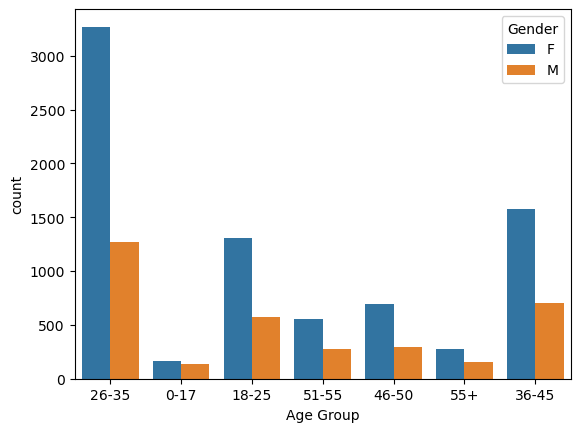

In [ ]:
sns.countplot(data=data, x='Age Group', hue='Gender')

<Axes: xlabel='Age Group', ylabel='Amount'>

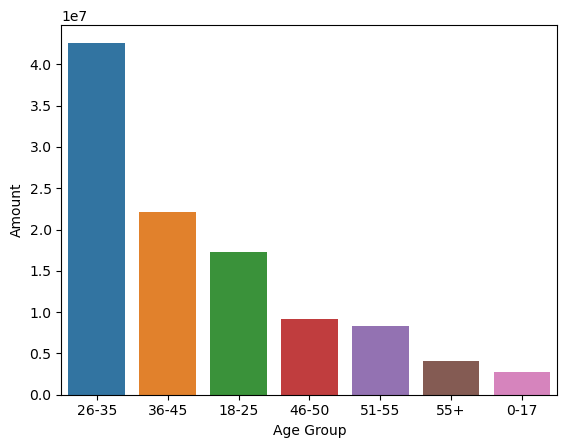

In [ ]:
age_data=data.groupby(['Age Group'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Age Group', y='Amount' ,data=age_data)

### states

<Axes: xlabel='State', ylabel='Orders'>

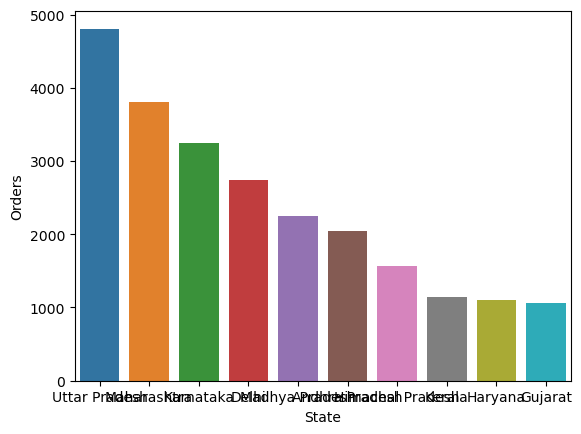

In [ ]:
state_data=data.groupby(['State'])['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=state_data, x='State', y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

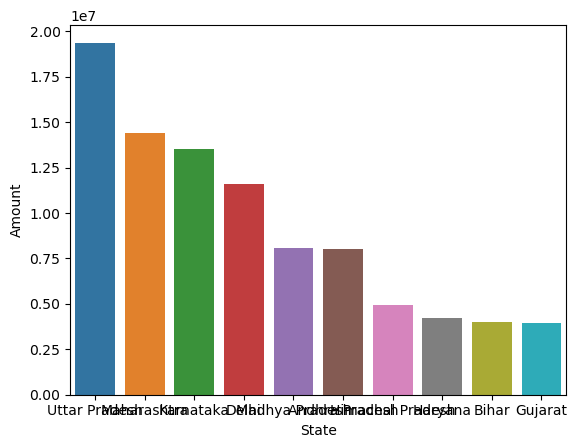

In [ ]:
state_data=data.groupby(['State'])['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=state_data, x='State', y='Amount')

### marital status

<Axes: xlabel='Marital_Status', ylabel='count'>

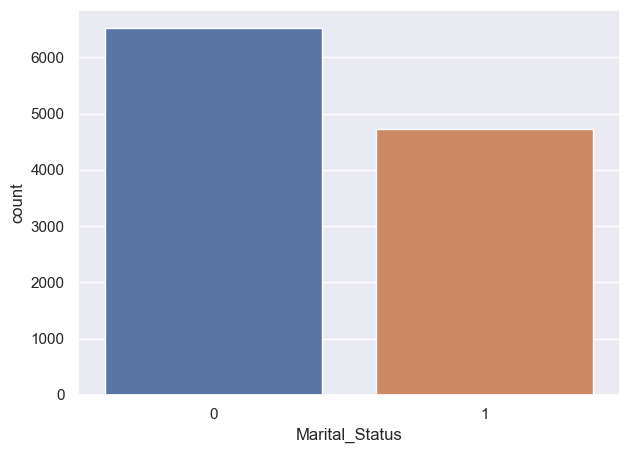

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=data, x='Marital_Status')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

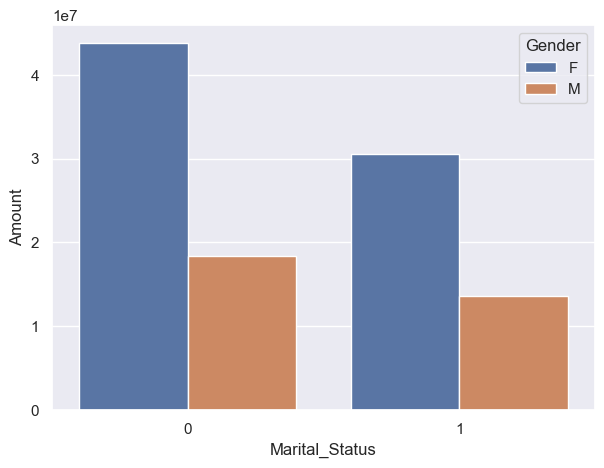

In [ ]:
state_data=data.groupby(['Marital_Status', 'Gender'])['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=state_data, x='Marital_Status', y='Amount', hue='Gender')

### occupation

<Axes: xlabel='Occupation', ylabel='count'>

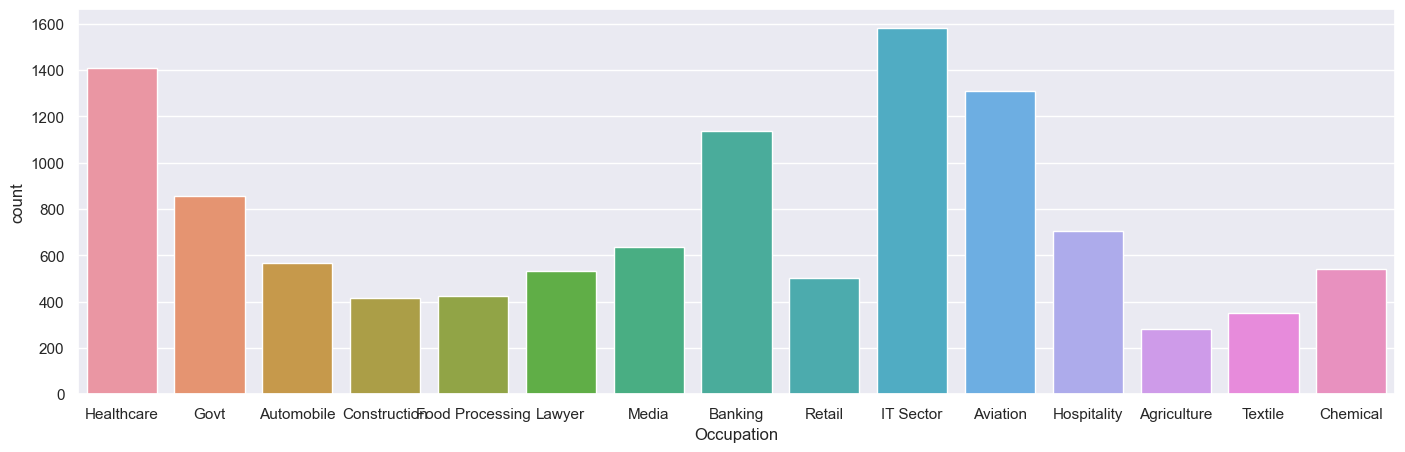

In [ ]:
sns.set(rc={'figure.figsize':(17,5)})
sns.countplot(data=data, x='Occupation')

<Axes: xlabel='Occupation', ylabel='Amount'>

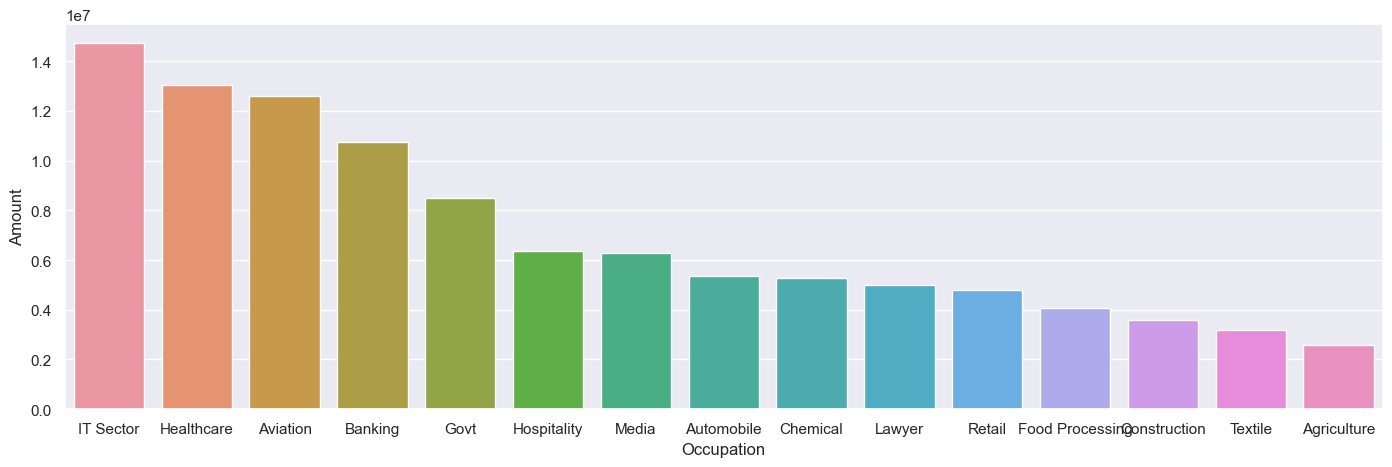

In [ ]:
ocu_data=data.groupby(['Occupation'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=ocu_data, x='Occupation', y='Amount')

### product catogory

<Axes: xlabel='Product_Category', ylabel='Amount'>

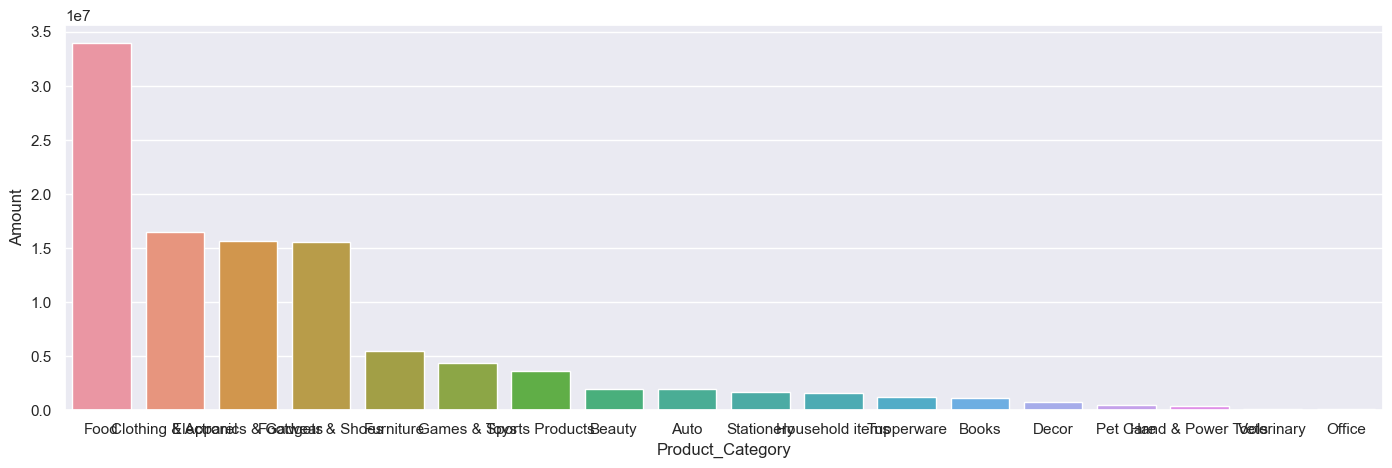

In [ ]:
occ1_data=data.groupby(['Product_Category'])['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=occ1_data, x='Product_Category', y='Amount')

<Axes: xlabel='Product_Category', ylabel='Orders'>

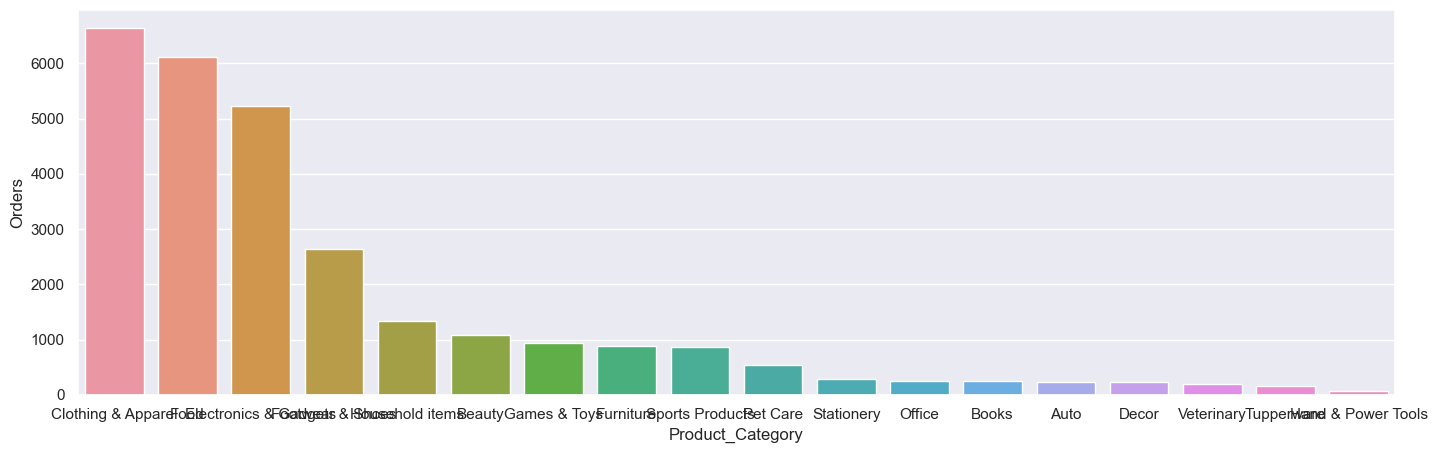

In [ ]:
Pro_data=data.groupby(['Product_Category'])['Orders'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=Pro_data, x='Product_Category', y='Orders')

<Axes: xlabel='Product_ID', ylabel='Orders'>

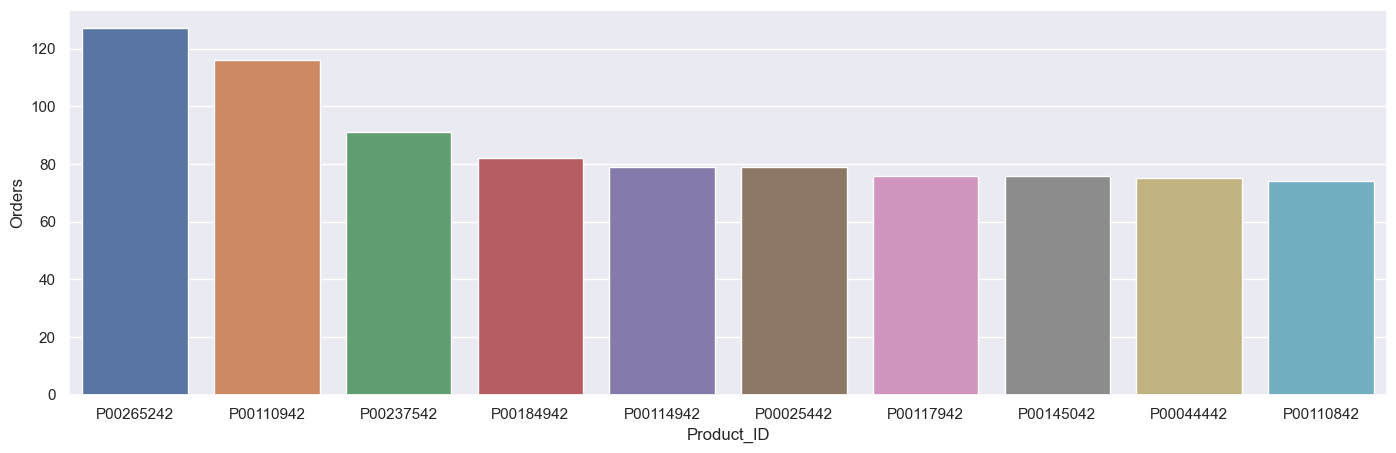

In [ ]:
pid_data=data.groupby(['Product_ID'])['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=pid_data, x='Product_ID', y='Orders')